In [1]:
import clustering_functions
import PreprocessingFunctions
import pandas as pd

In [ ]:
PreprocessingFunctions.getEmotionsinChorus()
PreprocessingFunctions.getEmotionsinVerse()

{'emotion': {'sadness': 0.571065, 'joy': 0.054482, 'fear': 0.322099, 'disgust': 0.042283, 'anger': 0.301698}}
{'emotion': {'sadness': 0.184473, 'joy': 0.624789, 'fear': 0.088717, 'disgust': 0.154802, 'anger': 0.128243}}
{'emotion': {'sadness': 0.129226, 'joy': 0.760034, 'fear': 0.129006, 'disgust': 0.003537, 'anger': 0.023251}}
{'emotion': {'sadness': 0.118178, 'joy': 0.793305, 'fear': 0.086532, 'disgust': 0.01407, 'anger': 0.015707}}
{'emotion': {'sadness': 0.162753, 'joy': 0.521819, 'fear': 0.086315, 'disgust': 0.00978, 'anger': 0.038335}}
{'emotion': {'sadness': 0.492299, 'joy': 0.17364, 'fear': 0.381799, 'disgust': 0.020932, 'anger': 0.081338}}
{'emotion': {'sadness': 0.123025, 'joy': 0.712377, 'fear': 0.09372, 'disgust': 0.044664, 'anger': 0.080241}}
{'emotion': {'sadness': 0.269951, 'joy': 0.592749, 'fear': 0.066655, 'disgust': 0.021417, 'anger': 0.060316}}
{'emotion': {'sadness': 0.419919, 'joy': 0.090773, 'fear': 0.511651, 'disgust': 0.019066, 'anger': 0.134516}}
{'emotion': {'

{'emotion': {'sadness': 0.108441, 'joy': 0.024459, 'fear': 0.033657, 'disgust': 2.5e-05, 'anger': 0.000614}}
{'emotion': {'sadness': 0.676807, 'joy': 0.028972, 'fear': 0.191207, 'disgust': 0.081549, 'anger': 0.087508}}
{'emotion': {'sadness': 0.160564, 'joy': 0.065785, 'fear': 0.132648, 'disgust': 0.018549, 'anger': 0.04022}}
{'emotion': {'sadness': 0.209165, 'joy': 0.019249, 'fear': 0.184546, 'disgust': 0.113191, 'anger': 0.27897}}
{'emotion': {'sadness': 0.293225, 'joy': 0.112886, 'fear': 0.204392, 'disgust': 0.070913, 'anger': 0.142087}}
{'emotion': {'sadness': 0.087257, 'joy': 0.004517, 'fear': 0.239587, 'disgust': 0.178694, 'anger': 0.599232}}
{'emotion': {'sadness': 0.407106, 'joy': 0.115401, 'fear': 0.266758, 'disgust': 0.043402, 'anger': 0.374808}}
{'emotion': {'sadness': 0.265515, 'joy': 0.047341, 'fear': 0.0885, 'disgust': 0.0331, 'anger': 0.069038}}
{'emotion': {'sadness': 0.030777, 'joy': 0.891312, 'fear': 0.011899, 'disgust': 0.005691, 'anger': 0.005538}}
{'emotion': {'sad

{'emotion': {'sadness': 0.593174, 'joy': 0.065838, 'fear': 0.401647, 'disgust': 0.055395, 'anger': 0.178819}}
{'emotion': {'sadness': 0.15869, 'joy': 0.661768, 'fear': 0.148358, 'disgust': 0.009836, 'anger': 0.076841}}
{'emotion': {'sadness': 0.079958, 'joy': 0.644559, 'fear': 0.197263, 'disgust': 0.026671, 'anger': 0.116444}}
{'emotion': {'sadness': 0.734783, 'joy': 0.031962, 'fear': 0.270687, 'disgust': 0.039398, 'anger': 0.17678}}
{'emotion': {'sadness': 0.148652, 'joy': 0.601097, 'fear': 0.077618, 'disgust': 0.052359, 'anger': 0.050924}}
{'emotion': {'sadness': 0.06284, 'joy': 0.830404, 'fear': 0.050559, 'disgust': 0.005906, 'anger': 0.02996}}
{'emotion': {'sadness': 0.467019, 'joy': 0.130508, 'fear': 0.244814, 'disgust': 0.092131, 'anger': 0.25449}}
{'emotion': {'sadness': 0.443876, 'joy': 0.378141, 'fear': 0.081131, 'disgust': 0.014902, 'anger': 0.195409}}
{'emotion': {'sadness': 0.438362, 'joy': 0.429019, 'fear': 0.088085, 'disgust': 0.008541, 'anger': 0.140701}}
{'emotion': {'s

In [10]:
getSongParts()
mergeAudioandTextualFeatures()
getEmotionsinchorus()
getEmotionsinverse()

In [4]:
clustering_functions.getMaximumEmotions()

In [5]:
#clustering with 3d visuas
lyrics = pd.read_csv('maximum_emotion.csv', sep=',', encoding = "ISO-8859-1")
Y_lyrics = lyrics[["verse_emotion","chorus_emotion","Genre","Energy","Danceability","Mode","Valence"]].as_matrix()
Y_lyrics       

array([[  1.   ,   1.   ,   4.   , ...,   0.303,   1.   ,   0.424],
       [  0.   ,   1.   ,   5.   , ...,   0.883,   1.   ,   0.862],
       [  4.   ,   1.   ,  22.   , ...,   0.702,   0.   ,   0.603],
       ..., 
       [  0.   ,   3.   ,   3.   , ...,   0.394,   1.   ,   0.073],
       [  1.   ,   1.   ,   3.   , ...,   0.478,   1.   ,   0.6  ],
       [  4.   ,   0.   ,   3.   , ...,   0.405,   0.   ,   0.444]])

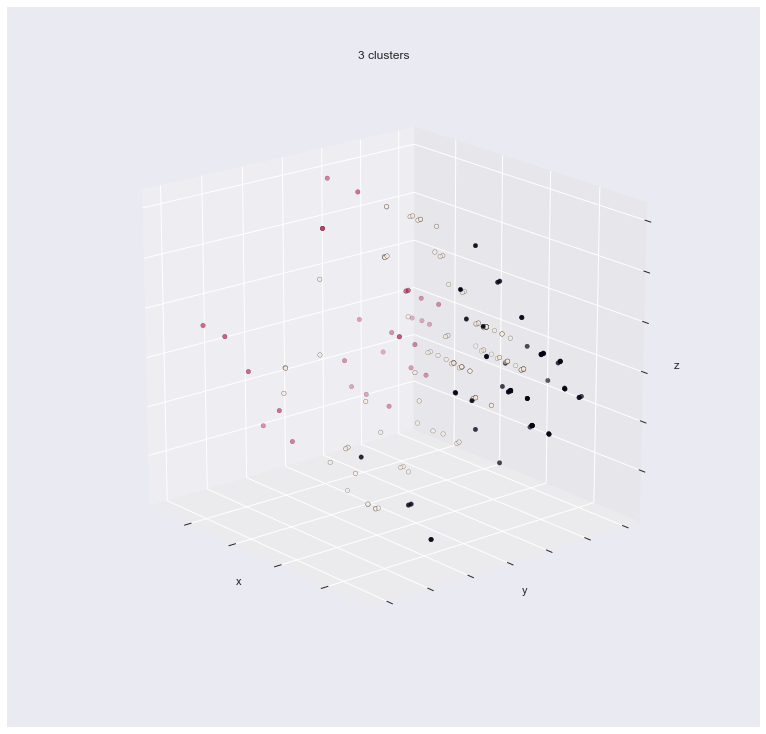

[0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 1 1 1 2 2 2 2
 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 0 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 0 0 0 0 0 0]


In [6]:
labels = clustering_functions.cluster3d(Y_lyrics,3)
print(labels)

In [7]:

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

#analyzing the clusters
genre_array = {1: 'pop', 2: 'jazz',3:'rock',4: 'avant-garde',5:'ballad',  6:'blues',  7:'country blues', 
               8:'alternative metal',9:'soul',10:'alternative rock',11:'crossover thrash', 
               12:'metal',13:'k-pop',14:'ska',15:'rock steady',16:'alternative',17:'folk',18:'punk rock', 
               19:'mashup',20:'country',21:'underground rap',22:'EDM'}
emotion_array = {0: 'sadness', 1: 'joy',2:'fear',3: 'disgust',4:'anger'}
                 
sp = pd.read_csv('maximum_emotion.csv', sep=',', encoding = "ISO-8859-1")
cluster1 =  clustering_functions.ClusterIndicesNumpy(0,labels)
cluster2 =  clustering_functions.ClusterIndicesNumpy(1,labels)
cluster3 =  clustering_functions.ClusterIndicesNumpy(2,labels)
cluster4 =  clustering_functions.ClusterIndicesNumpy(3,labels)
cluster5 =  clustering_functions.ClusterIndicesNumpy(4,labels)
view = []
print(str(len(cluster1)) + " here")
for i in cluster1:
    try:
        genre = sp.loc[i, 'Genre']
        verse = sp.loc[i, 'verse_emotion']
        chorus = sp.loc[i, 'chorus_emotion']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],genre_array[genre],emotion_array[verse],emotion_array[chorus],loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)

df = pd.DataFrame(data=view,columns=['Artist', 'Song Title', 'Genre', 'verse_emotion', 'chorus_emotion','Loudness','Energy','Valence','Mode','Danceability'])
#print(df)
df.to_csv('cluster1.csv')
print(len(cluster2))
view2 = []
for i in cluster2:
    try:
        genre = sp.loc[i, 'Genre']
        verse = sp.loc[i, 'verse_emotion']
        chorus = sp.loc[i, 'chorus_emotion']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view2.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],genre_array[genre],emotion_array[verse],emotion_array[chorus],loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)
df1 = pd.DataFrame(data=view2,columns=['Artist', 'Song Title', 'Genre', 'verse_emotion', 'chorus_emotion','Loudness','Energy','Valence','Mode','Danceability'])
print(df1)
df1.to_csv('cluster2.csv')
print(len(cluster3))
view3 = []
for i in cluster3:
    try:
        genre = sp.loc[i, 'Genre']
        verse = sp.loc[i, 'verse_emotion']
        chorus = sp.loc[i, 'chorus_emotion']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view3.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],genre_array[genre],emotion_array[verse],emotion_array[chorus],loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)

df2 = pd.DataFrame(data=view3,columns=['Artist', 'Song Title', 'Genre', 'verse_emotion', 'chorus_emotion','Loudness','Energy','Valence','Mode','Danceability'])
print(df2)
df2.to_csv('cluster3.csv')
view4 = []
print(str(len(cluster4)) + " here")
for i in cluster4:
    try:
        genre = sp.loc[i, 'Genre']
        verse = sp.loc[i, 'verse_emotion']
        chorus = sp.loc[i, 'chorus_emotion']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view4.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],genre_array[genre],emotion_array[verse],emotion_array[chorus],loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)

df3 = pd.DataFrame(data=view4,columns=['Artist', 'Song Title', 'Genre', 'verse_emotion', 'chorus_emotion','Loudness','Energy','Valence','Mode','Danceability'])
#print(df)
df3.to_csv('cluster4.csv')
view5 = []
print(str(len(cluster5)) + " here")
for i in cluster5:
    try:
        genre = sp.loc[i, 'Genre']
        verse = sp.loc[i, 'verse_emotion']
        chorus = sp.loc[i, 'chorus_emotion']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view5.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],genre_array[genre],emotion_array[verse],emotion_array[chorus],loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)

df4 = pd.DataFrame(data=view5,columns=['Artist', 'Song Title', 'Genre', 'verse_emotion', 'chorus_emotion','Loudness','Energy','Valence','Mode','Danceability'])
#print(df)
df4.to_csv('cluster5.csv')

67 here
31
            Artist                     Song Title            Genre  \
0           avicii                 Friend of Mine              EDM   
1           avicii                Lonely Together              EDM   
2           avicii  So Much Better (Avicii Remix)              EDM   
3           avicii      What Would I Change It To              EDM   
4           avicii                    Without You              EDM   
5           avicii                    You Be Love              EDM   
6     Nicky Thomas            Have a Little Faith      rock steady   
7   Nikolas Asimos                        Bagasas      alternative   
8   Nikolas Asimos                           Lina      alternative   
9        Phil Ochs                 Chords Of Fame             folk   
10       Phil Ochs       I Ain't Marching Anymore             folk   
11       Phil Ochs           Tape From California             folk   
12       Phil Ochs    The Pleasures of the Harbor             folk   
13    Rea

0 here


In [8]:
lyrics = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
X_lyrics = lyrics[["sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Energy","Danceability","Mode","Valence"]].as_matrix()
X_lyrics    

array([[ 0.297842,  0.643527,  0.023434, ...,  0.303   ,  1.      ,  0.424   ],
       [ 0.403503,  0.377848,  0.154008, ...,  0.883   ,  1.      ,  0.862   ],
       [ 0.194528,  0.10014 ,  0.400606, ...,  0.702   ,  0.      ,  0.603   ],
       ..., 
       [ 0.571947,  0.539841,  0.057515, ...,  0.394   ,  1.      ,  0.073   ],
       [ 0.423553,  0.447584,  0.174226, ...,  0.478   ,  1.      ,  0.6     ],
       [ 0.155213,  0.362808,  0.061548, ...,  0.405   ,  0.      ,  0.444   ]])

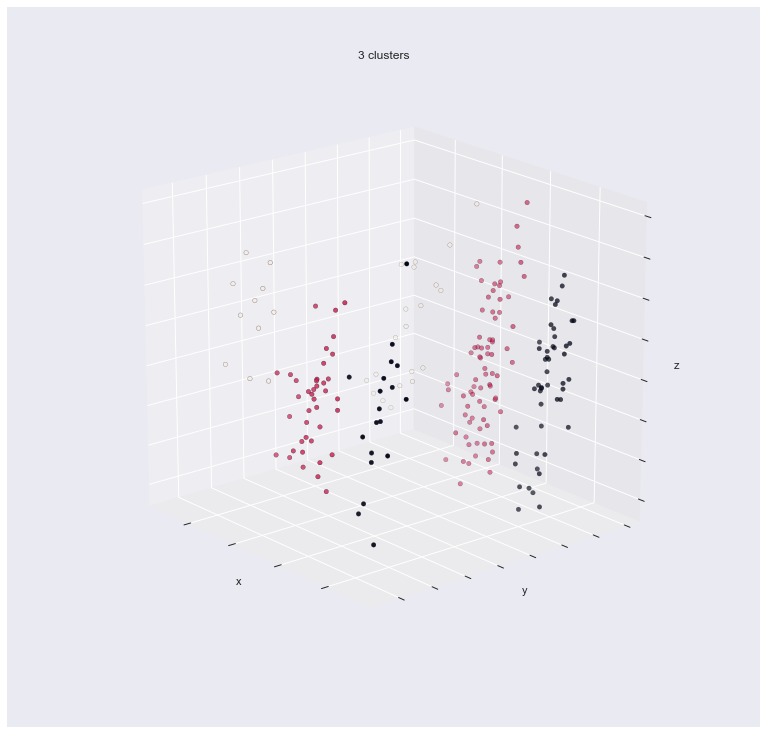

[0 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 2 2 2 1 1 1 1
 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 0 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 0 0 0 0 0 0]


In [9]:
labels = clustering_functions.cluster3d(X_lyrics,3)
print(labels)

In [10]:

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    color = 'red' if val < 0 else 'black'
    return 'color: %s' % color

#analyzing the clusters
genre_array = {1: 'pop', 2: 'jazz',3:'rock',4: 'avant-garde',5:'ballad',  6:'blues',  7:'country blues', 
               8:'alternative metal',9:'soul',10:'alternative rock',11:'crossover thrash', 
               12:'metal',13:'k-pop',14:'ska',15:'rock steady',16:'alternative',17:'folk',18:'punk rock', 
               19:'mashup',20:'country',21:'underground rap',22:'genre'}
emotion_array = {0: 'sadness', 1: 'joy',2:'fear',3: 'disgust',4:'anger'}
                 
sp = pd.read_csv('all_features.csv', sep=',', encoding = "ISO-8859-1")
cluster1_ =  clustering_functions.ClusterIndicesNumpy(0,labels)
cluster2_ =  clustering_functions.ClusterIndicesNumpy(1,labels)
cluster3_ =  clustering_functions.ClusterIndicesNumpy(2,labels)
cluster4_ =  clustering_functions.ClusterIndicesNumpy(3,labels)
cluster5_ =  clustering_functions.ClusterIndicesNumpy(4,labels)
view = []
print(str(len(cluster1_)) + " here")
for i in cluster1_:
    try:
        genre = sp.loc[i, 'Genre']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],sp.loc[i, 'sadness_verse'],sp.loc[i, 'joy_verse'],sp.loc[i, 'fear_verse'],sp.loc[i, 'disgust_verse'],sp.loc[i, 'anger_verse'],sp.loc[i, 'sadness_chorus'],sp.loc[i, 'joy_chorus'],sp.loc[i, 'fear_chorus'],sp.loc[i, 'disgust_chorus'],sp.loc[i, 'anger_chorus'],genre_array[genre],loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)

df = pd.DataFrame(data=view,columns=["Artist", "Song Title","sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Loudness","Energy","Danceability","Mode","Valence"])
#print(df)
df.to_csv('all_cluster1.csv')
print(len(cluster2_))
view2 = []
for i in cluster2_:
    try:
        genre = sp.loc[i, 'Genre']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view2.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],sp.loc[i, 'sadness_verse'],sp.loc[i, 'joy_verse'],sp.loc[i, 'fear_verse'],sp.loc[i, 'disgust_verse'],sp.loc[i, 'anger_verse'],sp.loc[i, 'sadness_chorus'],sp.loc[i, 'joy_chorus'],sp.loc[i, 'fear_chorus'],sp.loc[i, 'disgust_chorus'],sp.loc[i, 'anger_chorus'],genre_array[genre],loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)
df1 = pd.DataFrame(data=view2,columns=["Artist", "Song Title","sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Loudness","Energy","Danceability","Mode","Valence"])
print(df1)
df1.to_csv('all_cluster2.csv')
print(len(cluster3_))
view3 = []
for i in cluster3_:
    try:
        genre = sp.loc[i, 'Genre']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view3.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],sp.loc[i, 'sadness_verse'],sp.loc[i, 'joy_verse'],sp.loc[i, 'fear_verse'],sp.loc[i, 'disgust_verse'],sp.loc[i, 'anger_verse'],sp.loc[i, 'sadness_chorus'],sp.loc[i, 'joy_chorus'],sp.loc[i, 'fear_chorus'],sp.loc[i, 'disgust_chorus'],sp.loc[i, 'anger_chorus'],genre_array[genre],loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)

df2 = pd.DataFrame(data=view3,columns=["Artist", "Song Title","sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Loudness","Energy","Danceability","Mode","Valence"])
print(df2)
df2.to_csv('all_cluster3.csv')
print(len(cluster4_))
view4 = []
for i in cluster4_:
    try:
        genre = sp.loc[i, 'Genre']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view4.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],sp.loc[i, 'sadness_verse'],sp.loc[i, 'joy_verse'],sp.loc[i, 'fear_verse'],sp.loc[i, 'disgust_verse'],sp.loc[i, 'anger_verse'],sp.loc[i, 'sadness_chorus'],sp.loc[i, 'joy_chorus'],sp.loc[i, 'fear_chorus'],sp.loc[i, 'disgust_chorus'],sp.loc[i, 'anger_chorus'],genre_array[genre],loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)

df3 = pd.DataFrame(data=view4,columns=["Artist", "Song Title","sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Loudness","Energy","Danceability","Mode","Valence"])
print(df3)
df3.to_csv('all_cluster4.csv')
print(len(cluster5_))
view5 = []
for i in cluster5_:
    try:
        genre = sp.loc[i, 'Genre']
        tempo = sp.loc[i, 'Tempo']
        loudness = sp.loc[i, 'Loudness']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view5.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],sp.loc[i, 'sadness_verse'],sp.loc[i, 'joy_verse'],sp.loc[i, 'fear_verse'],sp.loc[i, 'disgust_verse'],sp.loc[i, 'anger_verse'],sp.loc[i, 'sadness_chorus'],sp.loc[i, 'joy_chorus'],sp.loc[i, 'fear_chorus'],sp.loc[i, 'disgust_chorus'],sp.loc[i, 'anger_chorus'],genre_array[genre],loudness,energy,valence,mode,dance])  
    except Exception as e:
        print(e)

df4 = pd.DataFrame(data=view5,columns=["Artist", "Song Title","sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Loudness","Energy","Danceability","Mode","Valence"])
print(df4)
df4.to_csv('all_cluster5.csv')

67 here
118
                  Artist                                         Song Title  \
0            Bob Brozman                                  The Lonesome Road   
1          Chris Cornell                                Before We Disappear   
2          Chris Cornell                                   Bend In The Road   
3          Chris Cornell                                           Circling   
4          Chris Cornell                                        Dead Wishes   
5          Chris Cornell                                       Higher Truth   
6          Chris Cornell                                          Josephine   
7          Chris Cornell                               Let Your Eyes Wander   
8          Chris Cornell                                       Misery Chain   
9          Chris Cornell                             Murderer Of Blue Skies   
10         Chris Cornell                      Nearly Forgot My Broken Heart   
11         Chris Cornell                

In [2]:
#analyzing clusters both from suicidal and non suicidal songs
songs = pd.read_csv('classification-data.csv', sep=',', encoding = "ISO-8859-1")
Z_lyrics = songs[["sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Energy","Danceability","Mode","Valence"]].as_matrix()
Z_lyrics


array([[ 0.755442,  0.078146,  0.08736 , ...,  0.276   ,  0.      ,  0.0842  ],
       [ 0.455974,  0.203143,  0.36686 , ...,  0.478   ,  0.      ,  0.208   ],
       [ 0.505373,  0.272861,  0.028019, ...,  0.4     ,  1.      ,  0.352   ],
       ..., 
       [ 0.529145,  0.428521,  0.026457, ...,  0.507   ,  1.      ,  0.327   ],
       [ 0.730552,  0.190255,  0.106638, ...,  0.363   ,  1.      ,  0.647   ],
       [ 0.44162 ,  0.011451,  0.091995, ...,  0.17    ,  1.      ,  0.0742  ]])

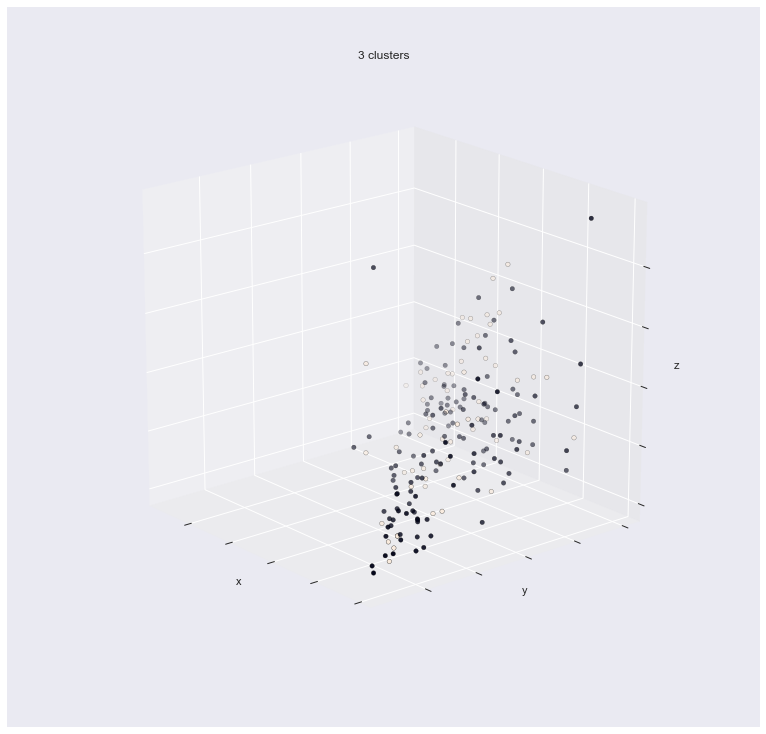

[1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1
 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0
 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [3]:
labels = clustering_functions.cluster3d(Z_lyrics,2)
print(labels)

In [14]:
sp = pd.read_csv('classification-data.csv', sep=',', encoding = "ISO-8859-1")
cluster1_ =  clustering_functions.ClusterIndicesNumpy(0,labels)
cluster2_ =  clustering_functions.ClusterIndicesNumpy(1,labels)
cluster3_ =  clustering_functions.ClusterIndicesNumpy(2,labels)
view = []
genre_array = {1: 'pop', 2: 'jazz',3:'rock',4: 'avant-garde',5:'ballad',  6:'blues',  7:'country blues', 
               8:'alternative metal',9:'soul',10:'alternative rock',11:'crossover thrash', 
               12:'metal',13:'k-pop',14:'ska',15:'rock steady',
               16:'alternative',17:'folk',18:'punk rock',19:'mashup',20:'country',
               21:'underground rap',22:'EDM',23:'hip pop' , 24:'neo mellow', 25:'hip hop' ,
               26:'R&B' , 27:'electronica', 28:'pop punk', 29:'emo', 30:'indie pop', 31:'soft rock',32:'rap'}
emotion_array = {0: 'sadness', 1: 'joy',2:'fear',3: 'disgust',4:'anger'}
print(str(len(cluster1_)) + " here")
for i in cluster1_:
    try:
        genre = sp.loc[i, 'Genre']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],sp.loc[i, 'sadness_verse'],sp.loc[i, 'joy_verse'],sp.loc[i, 'fear_verse'],sp.loc[i, 'disgust_verse'],sp.loc[i, 'anger_verse'],sp.loc[i, 'sadness_chorus'],sp.loc[i, 'joy_chorus'],sp.loc[i, 'fear_chorus'],sp.loc[i, 'disgust_chorus'],sp.loc[i, 'anger_chorus'],genre_array[genre],energy,valence,mode,dance])  
    except Exception as e:
        print(e)

df = pd.DataFrame(data=view,columns=["Artist", "Song Title","sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Energy","Danceability","Mode","Valence"])
#print(df)
df.to_csv('cluster1-newdata.csv')
print(len(cluster2_))
view2 = []
for i in cluster2_:
    try:
        genre = sp.loc[i, 'Genre']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view2.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],sp.loc[i, 'sadness_verse'],sp.loc[i, 'joy_verse'],sp.loc[i, 'fear_verse'],sp.loc[i, 'disgust_verse'],sp.loc[i, 'anger_verse'],sp.loc[i, 'sadness_chorus'],sp.loc[i, 'joy_chorus'],sp.loc[i, 'fear_chorus'],sp.loc[i, 'disgust_chorus'],sp.loc[i, 'anger_chorus'],genre_array[genre],energy,valence,mode,dance])  
    except Exception as e:
        print(e)
df1 = pd.DataFrame(data=view2,columns=["Artist", "Song Title","sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Energy","Danceability","Mode","Valence"])
print(df1)
df1.to_csv('cluster2-newdata.csv')
print(len(cluster3_))
view3 = []
for i in cluster3_:
    try:
        genre = sp.loc[i, 'Genre']
        energy = sp.loc[i, 'Energy']
        valence = sp.loc[i, 'Valence']
        mode = sp.loc[i, 'Mode']
        dance = sp.loc[i, 'Danceability']
        view3.append([sp.loc[i, 'Artist'], sp.loc[i, 'Song Title'],sp.loc[i, 'sadness_verse'],sp.loc[i, 'joy_verse'],sp.loc[i, 'fear_verse'],sp.loc[i, 'disgust_verse'],sp.loc[i, 'anger_verse'],sp.loc[i, 'sadness_chorus'],sp.loc[i, 'joy_chorus'],sp.loc[i, 'fear_chorus'],sp.loc[i, 'disgust_chorus'],sp.loc[i, 'anger_chorus'],genre_array[genre],energy,valence,mode,dance])  
    except Exception as e:
        print(e)

df2 = pd.DataFrame(data=view3,columns=["Artist", "Song Title","sadness_verse","joy_verse","fear_verse","disgust_verse","anger_verse","sadness_chorus","joy_chorus","fear_chorus","disgust_chorus","anger_chorus","Genre","Energy","Danceability","Mode","Valence"])
print(df2)
df2.to_csv('cluster3-newdata.csv')

139 here
61
                 Artist                     Song Title  sadness_verse  \
0           Alicia Keys                            101       0.755442   
1           Alicia Keys               28 Thousand Days       0.455974   
2            Ben Harper              A House Is A Home       0.591305   
3            Ben Harper           All That Matters Now       0.764776   
4              Big Sean                        10 2 10       0.525978   
5              Big Sean                       100 Keys       0.321783   
6              Big Sean                            100       0.709688   
7                 Drake                     God's Plan       0.651951   
8                 Drake                  Hotline Bling       0.684169   
9                 Drake                      One Dance       0.532076   
10                Drake                   Passionfruit       0.525826   
11               Eminem                  Lose Yourself       0.480191   
12               Eminem           Love 